In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

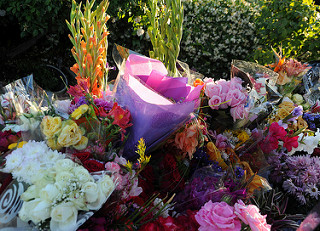

In [6]:
PIL.Image.open(str(roses[3]))

In [7]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [9]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [10]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=18)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 3s 21ms/step - loss: 1.2425 - accuracy: 0.4651
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9552 - accuracy: 0.6294
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7506 - accuracy: 0.7122
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5495 - accuracy: 0.7991
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.3244 - accuracy: 0.8863
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1595 - accuracy: 0.9531
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1082 - accuracy: 0.9713
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0537 - accuracy: 0.9855
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0489 - accuracy: 0.9873
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0188 - accuracy: 0.9978
Epoch 11/

In [15]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 11ms/step - loss: 1.9784 - accuracy: 0.6732


[1.9784159660339355, 0.6732025742530823]

In [16]:
 data_augmentation = keras.Sequential([
     layers.experimental.preprocessing.RandomZoom(0.1),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(None,
                                                                            None,3))
])

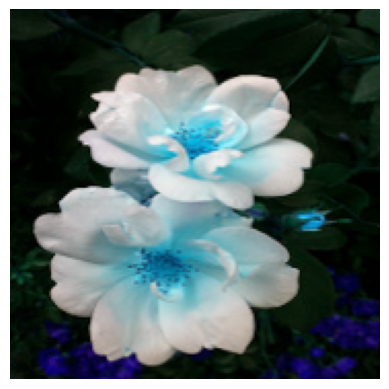

In [17]:
plt.axis('off')
plt.imshow(X[0])

In [18]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 45s 469ms/step - loss: 1.2875 - accuracy: 0.4560
Epoch 2/30
86/86 [==============================] - 42s 492ms/step - loss: 1.0404 - accuracy: 0.5934
Epoch 3/30
86/86 [==============================] - 29s 331ms/step - loss: 0.9487 - accuracy: 0.6312
Epoch 4/30
86/86 [==============================] - 25s 293ms/step - loss: 0.8738 - accuracy: 0.6566
Epoch 5/30
86/86 [==============================] - 25s 290ms/step - loss: 0.8201 - accuracy: 0.6922
Epoch 6/30
86/86 [==============================] - 26s 303ms/step - loss: 0.7637 - accuracy: 0.7082
Epoch 7/30
86/86 [==============================] - 25s 287ms/step - loss: 0.7200 - accuracy: 0.7293
Epoch 8/30
86/86 [==============================] - 25s 291ms/step - loss: 0.6674 - accuracy: 0.7576
Epoch 9/30
86/86 [==============================] - 25s 291ms/step - loss: 0.6343 - accuracy: 0.7445
Epoch 10/30
86/86 [==============================] - 25s 291ms/step - loss: 0.6084 - accura

In [20]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 8ms/step - loss: 1.4142 - accuracy: 0.6928


[1.4141637086868286, 0.6928104162216187]